# Natural graphite

This example uses data from [Mancini](https://doi.org/10.1002/batt.202200109)'s work.

## Data visualization

First we import the libraries that we will use throughout this example, this part is not strictly necessary to use **galpynostatic**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

We load Mancini's data with pandas.

In [2]:
df = pd.read_csv("data/mancini.csv")

In this case we have the C-rates and SOCs between 0 and 100 defined in this single file, so we divide this last column by 100 to have it between 0 and 1, as required by our model, and transform them to numpy arrays with the necessary shape.

In [3]:
C_rates = np.asarray(df["crates"]).reshape(-1, 1)
soc = np.asarray(df["xmaxs"]) / 100.0

Now we can plot

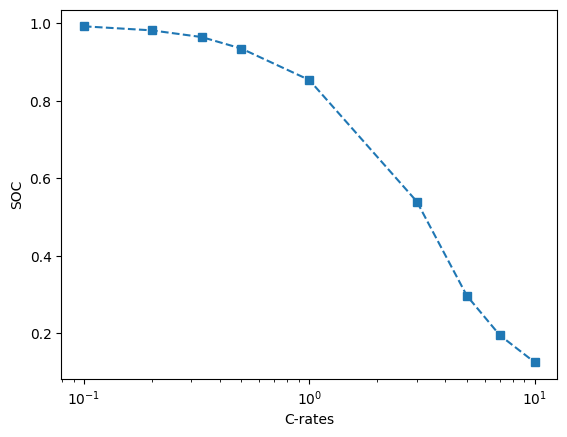

In [4]:
plt.plot(C_rates, soc, marker="s", ls="--")

plt.ylabel("SOC")
plt.xlabel("C-rates")
plt.xscale("log")
plt.show()

## Fitting

We now proceed to adjust this data. We load the surface data for the spherical geometry

In [5]:
from galpynostatic.datasets import load_spherical
dataset = load_spherical()

and fit the model, for this we use the value given by this work for the nanoparticle radius (7.5 $\mu m$).

In [6]:
from galpynostatic.model import GalvanostaticRegressor

d = 0.00075

greg = GalvanostaticRegressor(dataset, d, 3)
greg.fit(C_rates, soc)

## Results

We can start by knowing the values obtained for the diffusion coefficient and the kinetic rate constant. 

In [7]:
print(f"Diffusion coefficient: {greg.dcoeff_:.3e} cm^2/s")
print(f"Kinetic rate constant: {greg.k0_:.3e} cm/s")

Diffusion coefficient: 1.233e-10 cm^2/s
Kinetic rate constant: 2.310e-07 cm/s


the mean square error between the mancini data and the values predicted by the model is 

In [8]:
print(f"{greg.mse_:.6f}")

0.000202


We can also estimate an optimal value for the characteristic diffusion length of the nanoparticle to charge 80% of the electrode in 5 minutes.

In [9]:
from galpynostatic.predict import t_minutes_length
new_d = t_minutes_length(greg)
print(f"{new_d:.6f} micrometers")

2.163024 micrometers


Let's plot now to see how the adjustment worked out

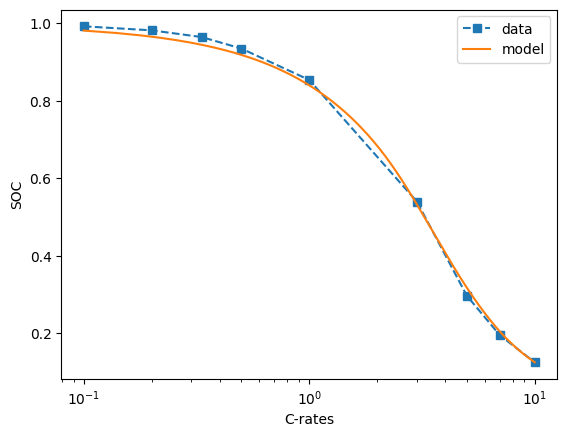

In [10]:
greg.plot.versus_data(C_rates, soc)

plt.legend()
plt.show()

We see high agreement between Mancini's discrete measurements and the continuous prediction of this model. Finally, we see which region of the surface we are in.

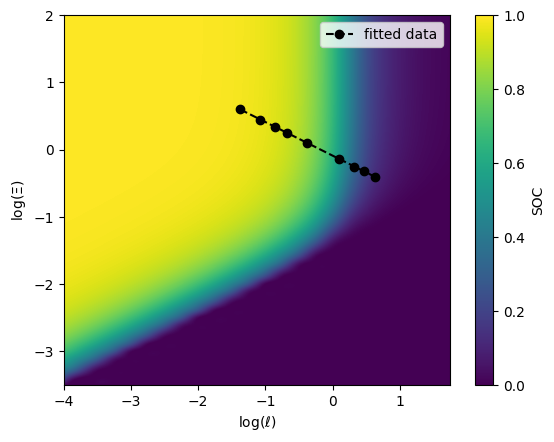

In [11]:
greg.plot.in_surface(C_rates)
plt.legend()
plt.show()